In [41]:
import pandas as pd
import numpy as np
from functools import reduce
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

In [3]:
frequency = pd.read_csv("Train Data Zip/frequency_domain_features_train.csv")
time = pd.read_csv("Train Data Zip/time_domain_features_train.csv")
nl_features = pd.read_csv("Train Data Zip/heart_rate_non_linear_features_train.csv")

In [4]:
print(frequency.shape)
print(time.shape)
print(nl_features.shape)

(369289, 12)
(369289, 20)
(369289, 7)


In [5]:
print(frequency.columns)
print(time.columns)
print(nl_features.columns)

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF'],
      dtype='object')
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid'],
      dtype='object')
Index(['uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition'], dtype='object')


In [6]:
print(frequency.dtypes)
print(time.dtypes)
print(nl_features.dtypes)

uuid        object
VLF        float64
VLF_PCT    float64
LF         float64
LF_PCT     float64
LF_NU      float64
HF         float64
HF_PCT     float64
HF_NU      float64
TP         float64
LF_HF      float64
HF_LF      float64
dtype: object
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
uuid                  object
dtype: object
uuid          object
SD1          float64
SD2          float64
sampen       float64
higuci       float64
datasetId      int64
condition     object
dtype: object


In [7]:
frames = [frequency, time, nl_features]

In [8]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='uuid'), frames)

In [9]:
df_final.shape

(369289, 37)

In [10]:
df_final.sample(10)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId,condition
167437,316983c8-6f7e-4fae-b597-7e85e5f58265,1995.847510,59.089969,1215.145391,35.976147,87.939673,166.648916,4.933884,12.060327,3377.641817,...,0.017339,1.570273,0.680098,-1.017411,11.612011,141.794451,1.906381,1.192341,2,no stress
8226,7faa4144-8cce-4755-8a53-059051e06084,1898.374401,70.063820,759.262163,28.022295,93.606783,51.856582,1.913885,6.393217,2709.493147,...,0.010393,1.709047,3.069197,0.668863,10.634385,96.991901,2.049691,1.239445,2,no stress
7805,dddfe9b3-f062-43e1-860f-cc4a146b57f6,2731.292723,83.579203,510.633987,15.625708,95.158032,25.982814,0.795090,4.841968,3267.909524,...,0.007229,2.002368,0.859664,0.368540,8.237834,123.033368,2.083872,1.153045,2,no stress
260915,6bdbbd83-1815-4cda-b2be-0b3dbf081f95,5147.002898,82.695983,981.021373,15.761896,91.088075,95.981704,1.542121,8.911925,6224.005975,...,0.015622,1.735764,-0.358722,1.046651,12.175261,559.129459,1.549831,1.109053,2,no stress
46423,7f8ab25c-f152-4fc3-9a9d-feb8943cb46c,2032.305844,75.557477,655.026261,24.352699,99.632507,2.416053,0.089825,0.367493,2689.748159,...,0.004823,2.899210,-0.444934,-0.307591,8.981608,117.537803,2.162690,1.083704,2,interruption
99956,b97f729e-b5e5-439f-aa4d-79725011c7bb,2370.802440,82.930402,455.729613,15.941370,93.390425,32.253620,1.128228,6.609575,2858.785672,...,0.007616,1.897355,0.042781,0.237525,8.137312,108.497201,2.177846,1.166528,2,no stress
303739,09438258-2b64-4991-b617-b1a86522a8bc,908.020242,58.246650,641.276178,41.135855,98.521087,9.626279,0.617496,1.478913,1558.922699,...,0.006295,2.212463,0.987643,-0.755150,8.268927,75.425996,2.116963,1.148961,2,time pressure
255964,fc5f6107-2084-47b0-8c56-bcc3959ee73a,482.417586,46.677412,521.284245,50.438044,94.590391,29.812158,2.884543,5.409609,1033.513990,...,0.007086,1.840671,2.491872,0.518899,6.435131,63.242278,2.027801,1.185141,2,no stress
324076,10b4803f-d239-4dfd-869b-75a47b5c70ee,658.569320,51.161680,547.685839,42.547575,87.119244,80.976457,6.290745,12.880756,1287.231616,...,0.012651,1.511573,-0.373140,0.068513,10.365894,89.566626,2.188947,1.339778,2,interruption
123027,62b9c37f-0a60-4fc7-8063-e0cb8a323c0a,7035.395059,87.154293,999.643712,12.383561,96.402326,37.306078,0.462147,3.597674,8072.344848,...,0.011329,2.682058,-0.767302,-0.622153,13.779361,535.132443,1.904653,1.084039,2,no stress


In [11]:
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


In [12]:
df_final.stb.freq(['condition'],style=True)

,condition,count,percent,cumulative_count,cumulative_percent
0,no stress,"200,082",54.18%,"200,082",54.18%
1,interruption,"105,150",28.47%,"305,232",82.65%
2,time pressure,"64,057",17.35%,"369,289",100.00%


In [13]:
df_final.isna().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

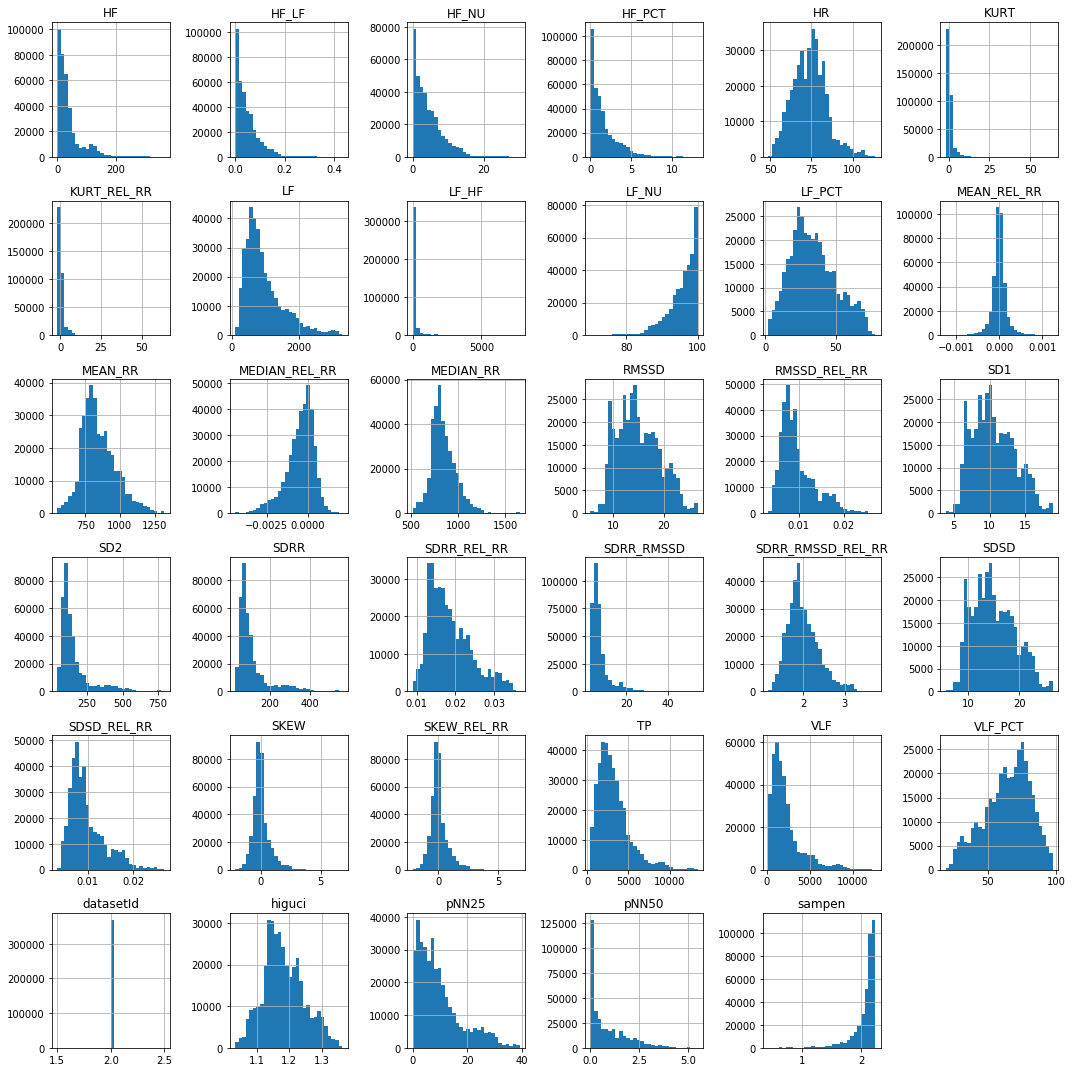

In [14]:
df_final.hist(bins=30, figsize=(15, 15))
plt.tight_layout()    
plt.show()

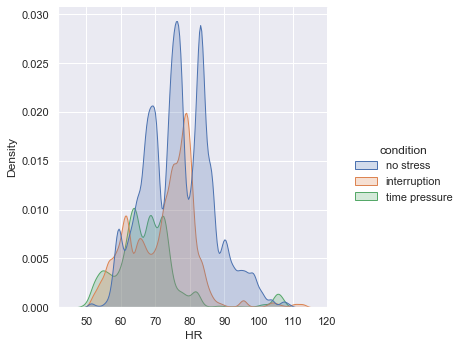

In [52]:
sns.displot(df_final, x="HR", hue="condition", kind="kde", fill=True)

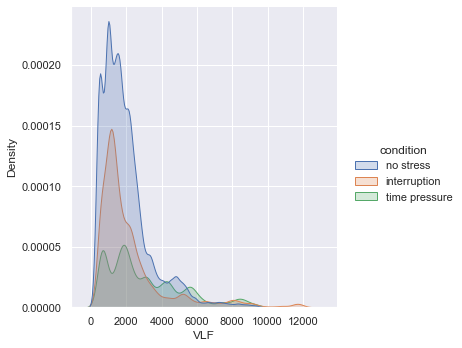

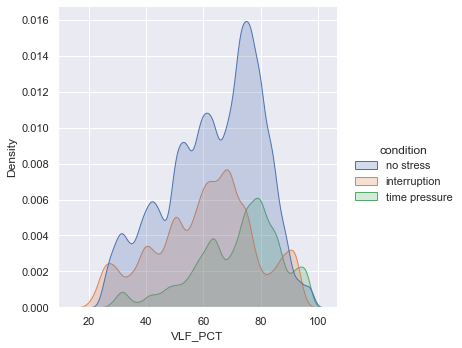

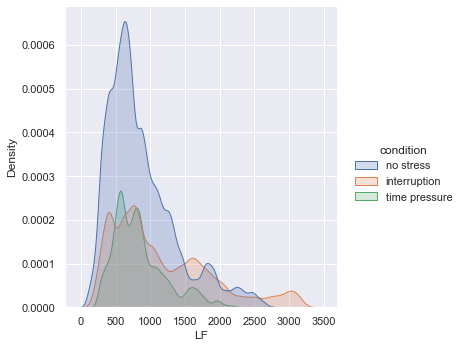

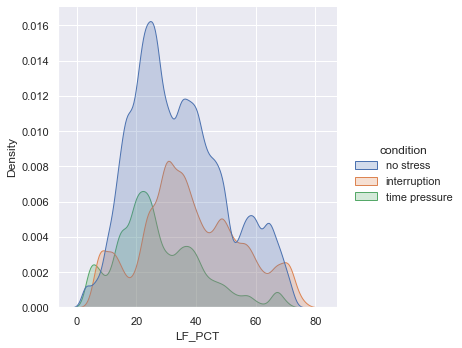

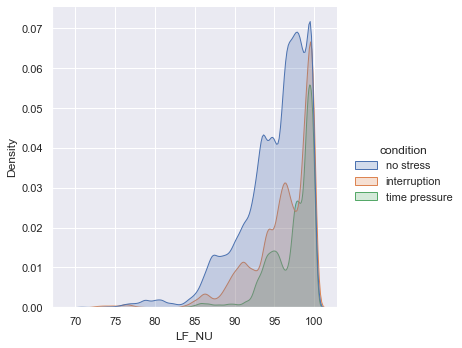

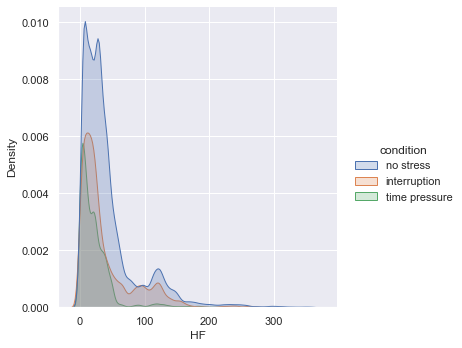

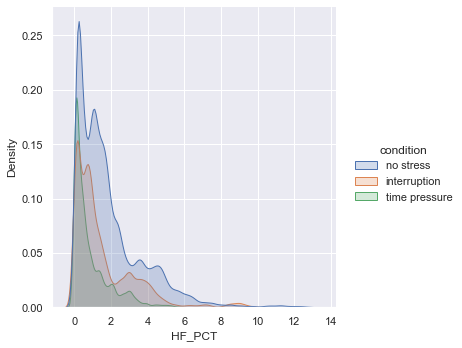

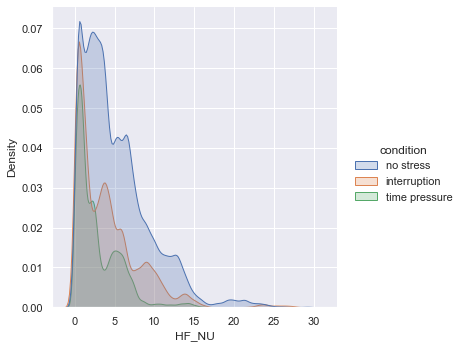

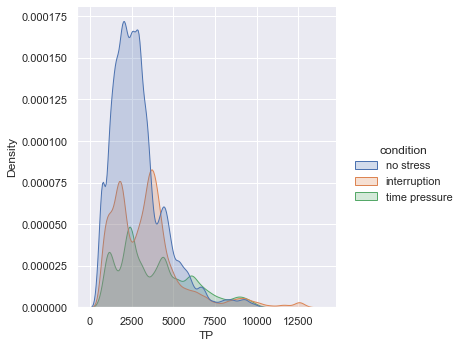

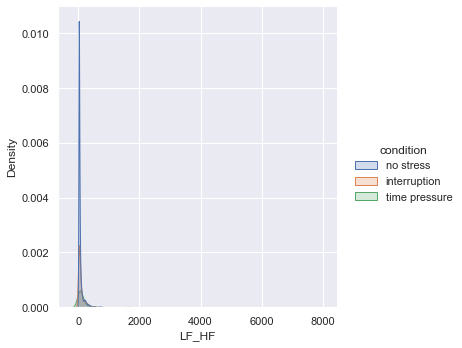

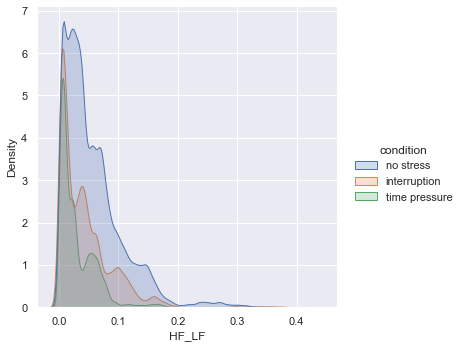

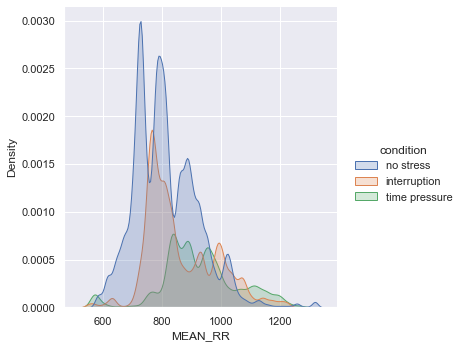

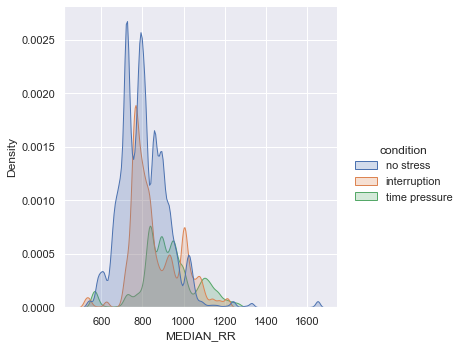

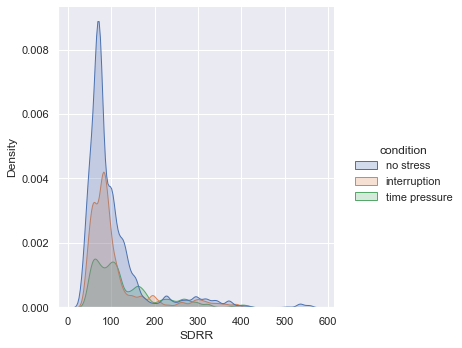

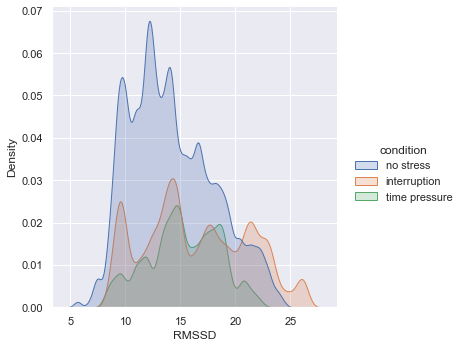

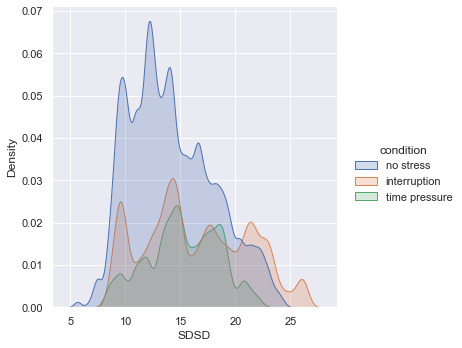

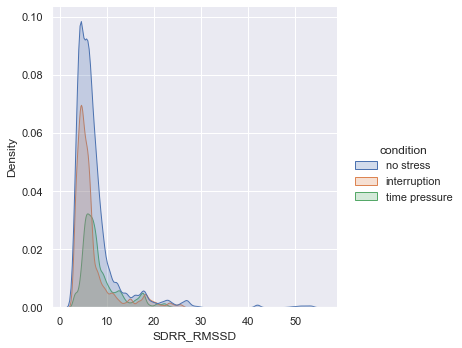

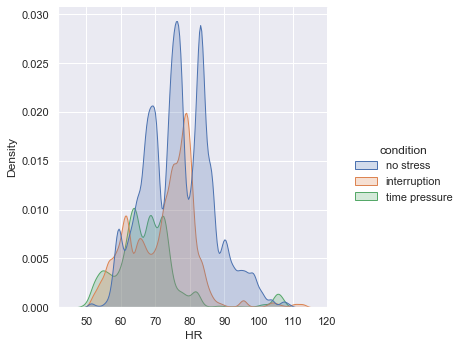

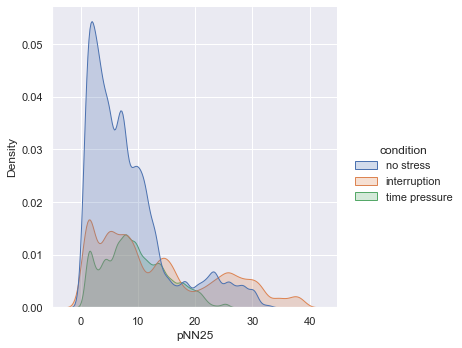

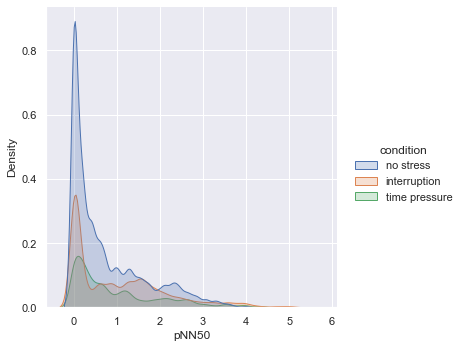

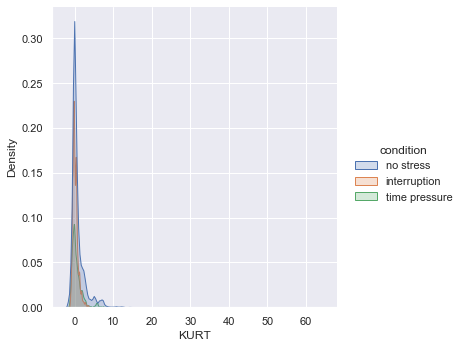

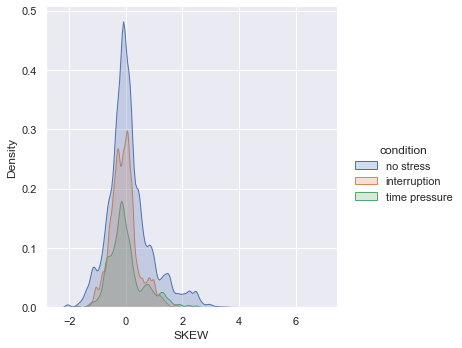

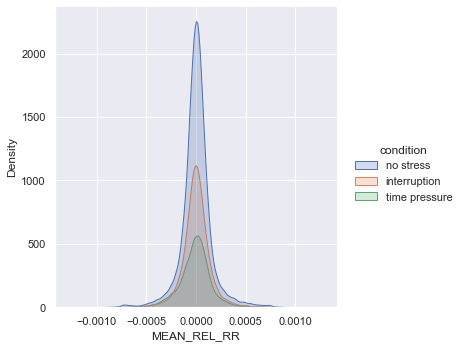

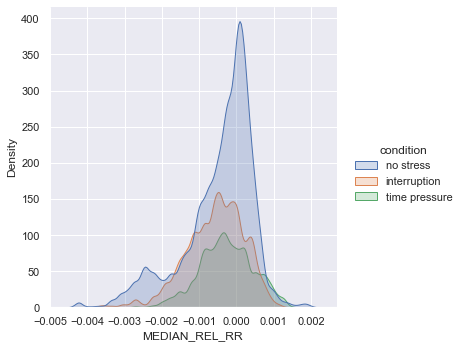

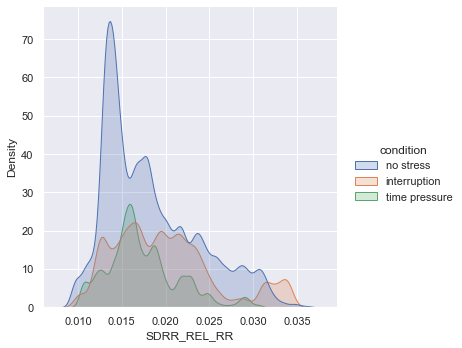

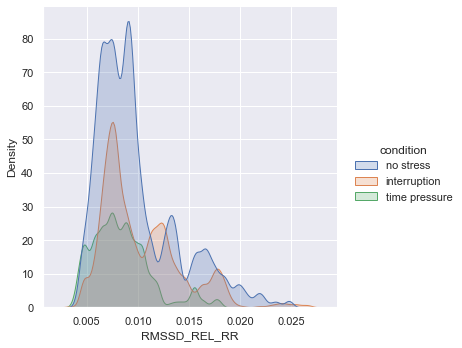

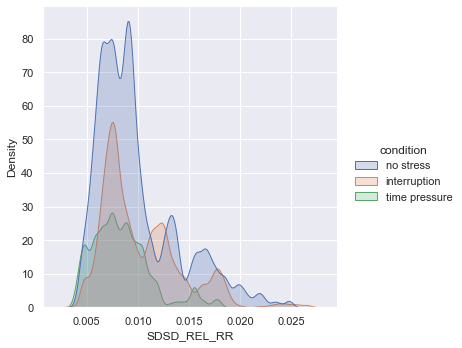

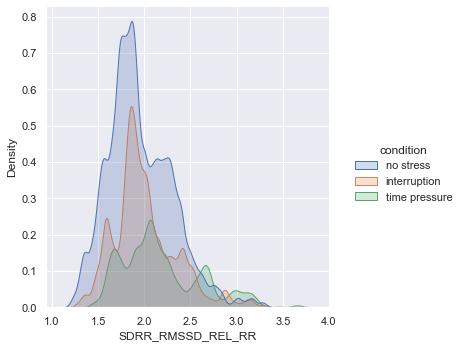

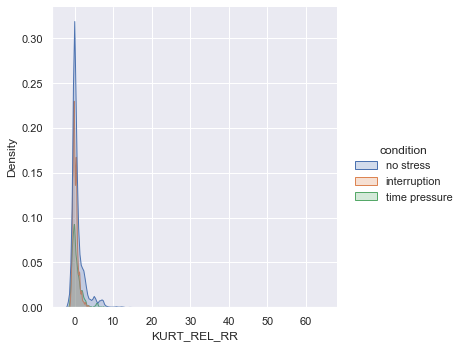

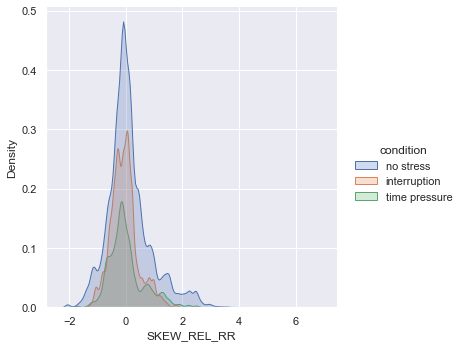

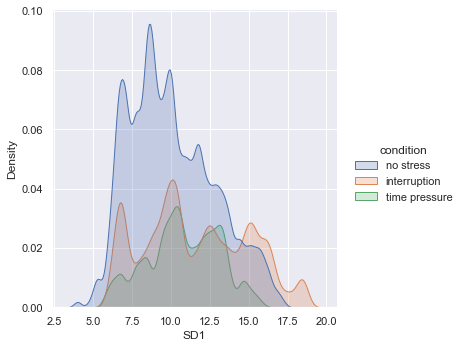

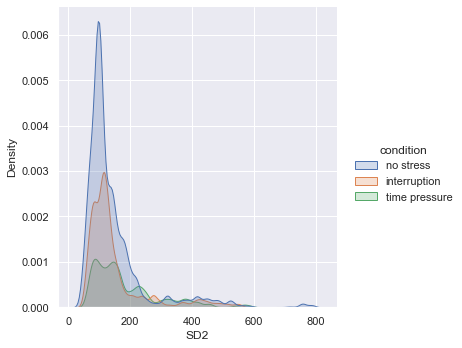

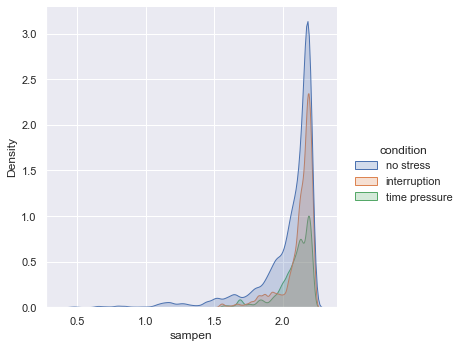

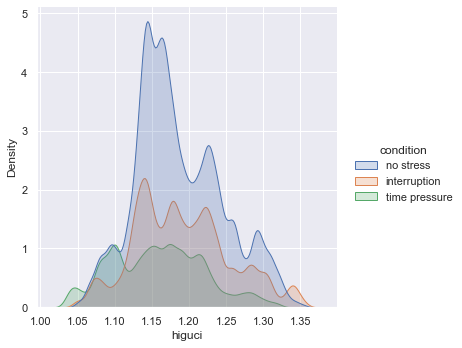

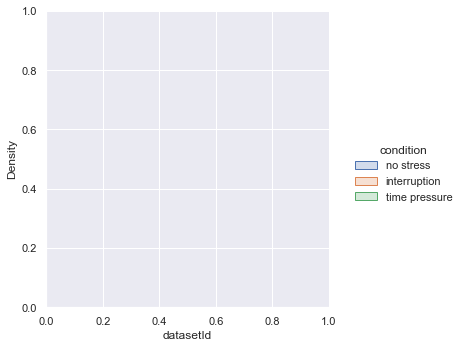

In [57]:
for i, column in enumerate(df_final.columns):
    if (column != 'uuid') and (column != 'condition'): 
        sns.displot(df_final, x=column, hue="condition", kind="kde", fill=True)

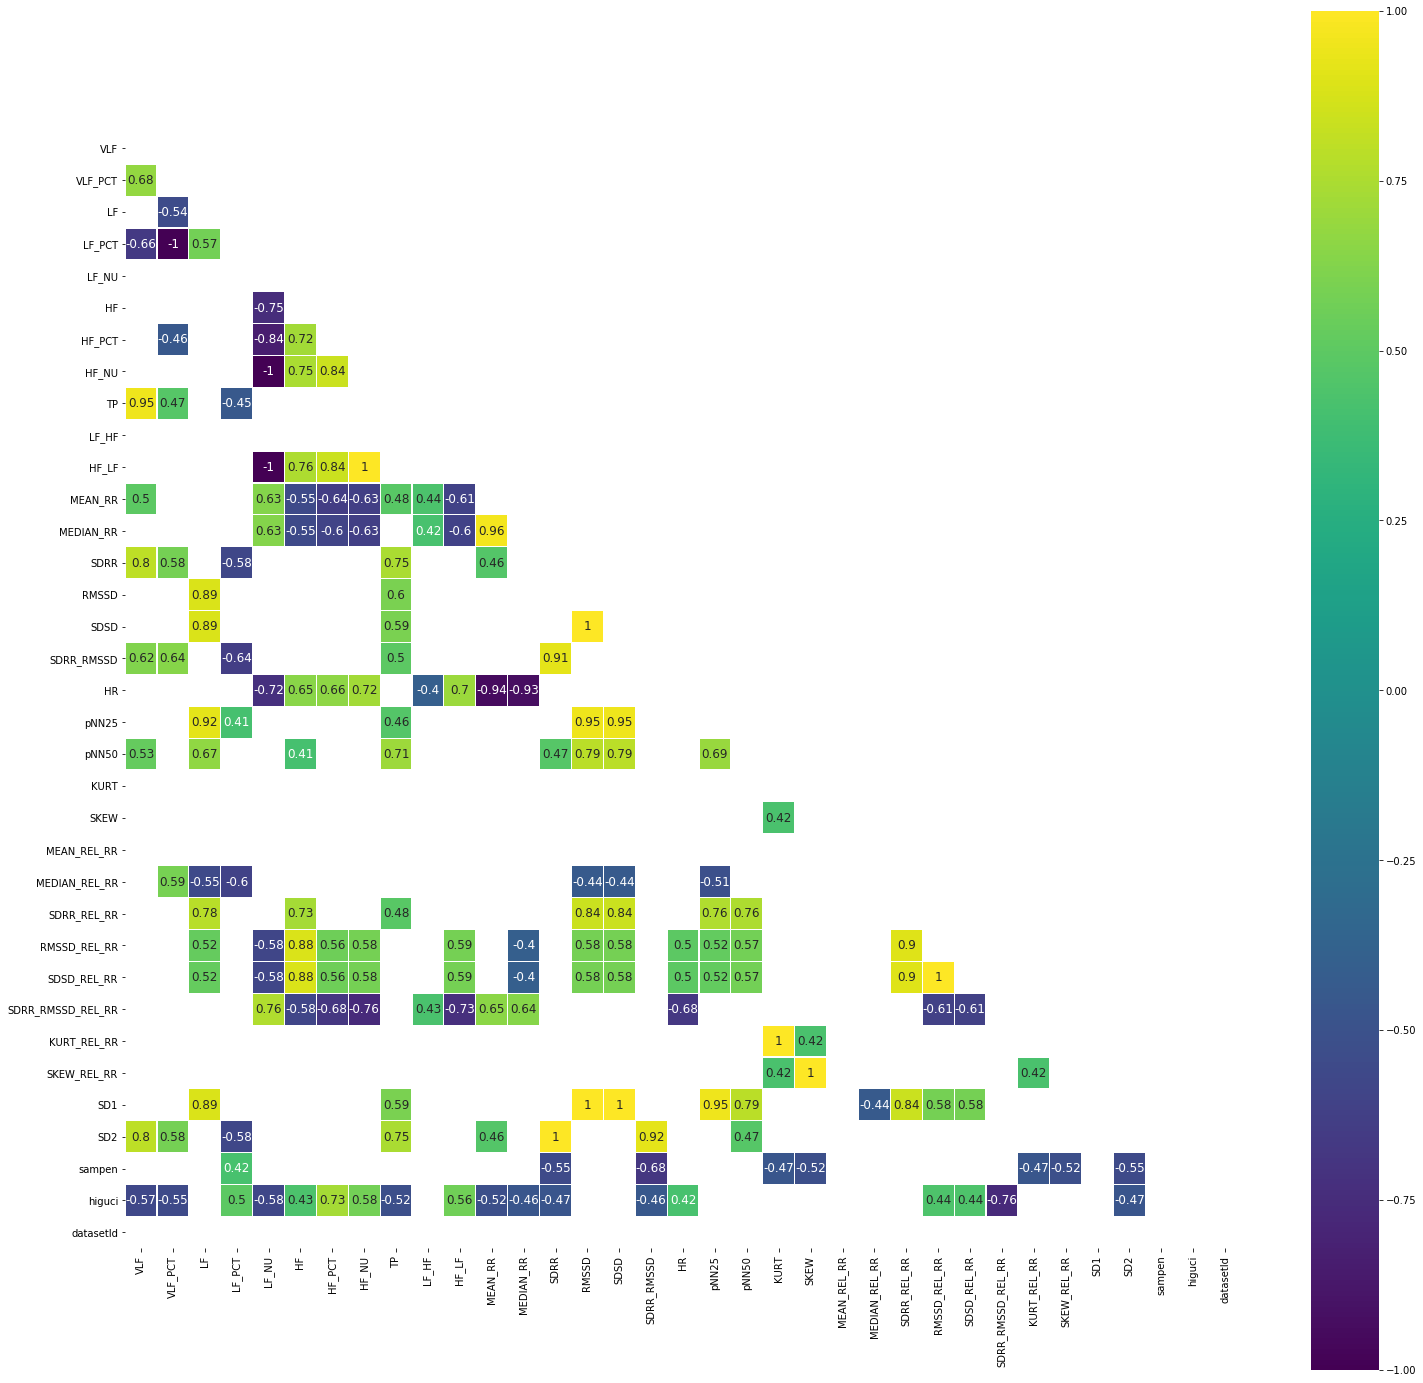

In [23]:
corr = df_final.corr()
plt.figure(figsize=(25, 25))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Inspecting only those entries where there is a minimum correlation of 0.25
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            mask=mask, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

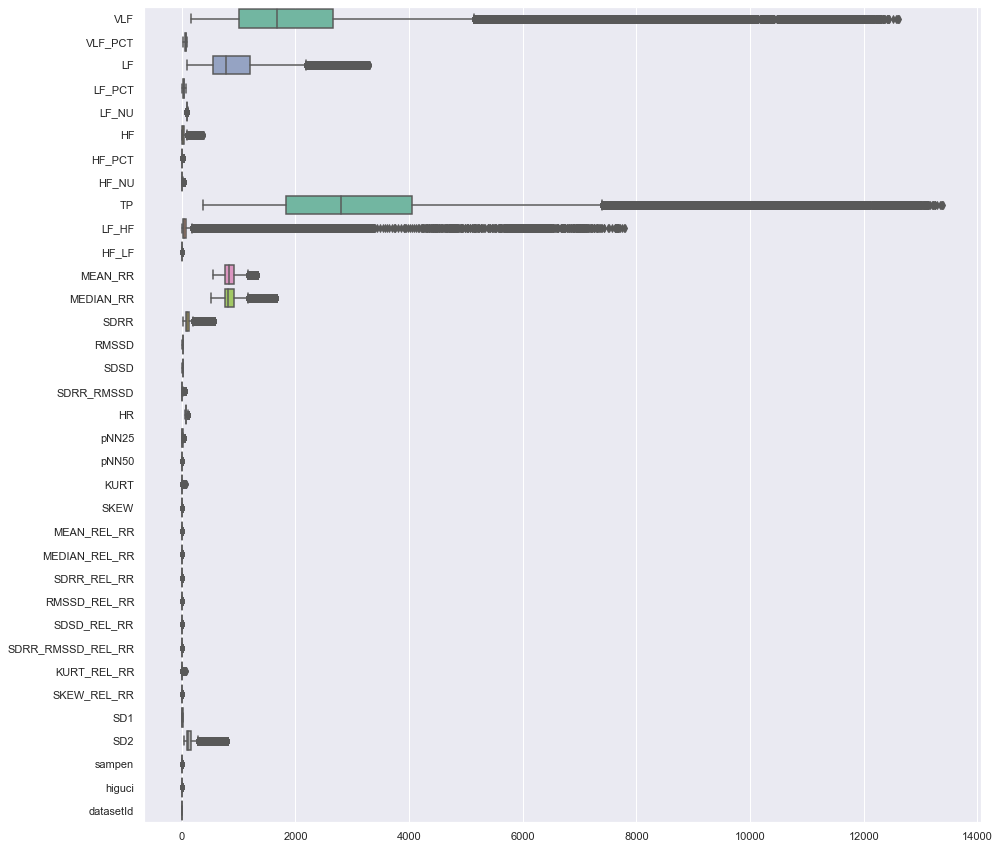

In [24]:
#Boxplot on overall dataset
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data=vehicles, orient="h", palette="Set2")

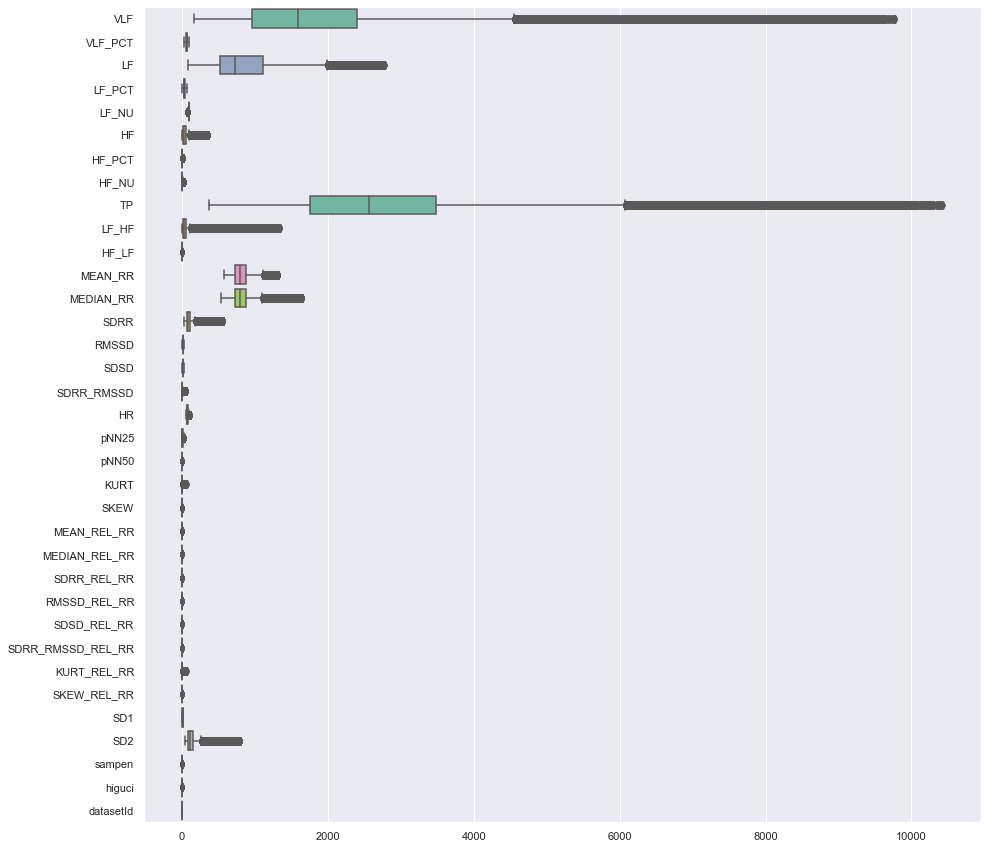

In [27]:
#Boxplot for "no stress"
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data=df_final[df_final["condition"]=="no stress"], orient="h", palette="Set2")

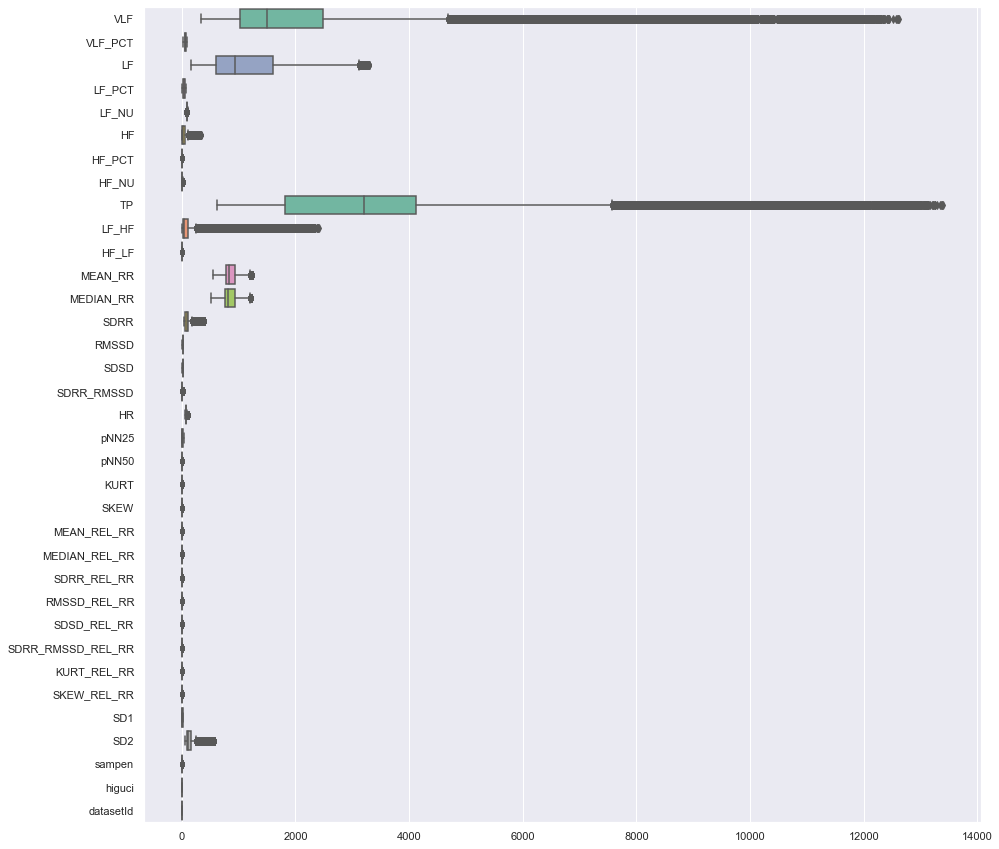

In [28]:
#Boxplot for "interruption"
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data=df_final[df_final["condition"]=="interruption"], orient="h", palette="Set2")

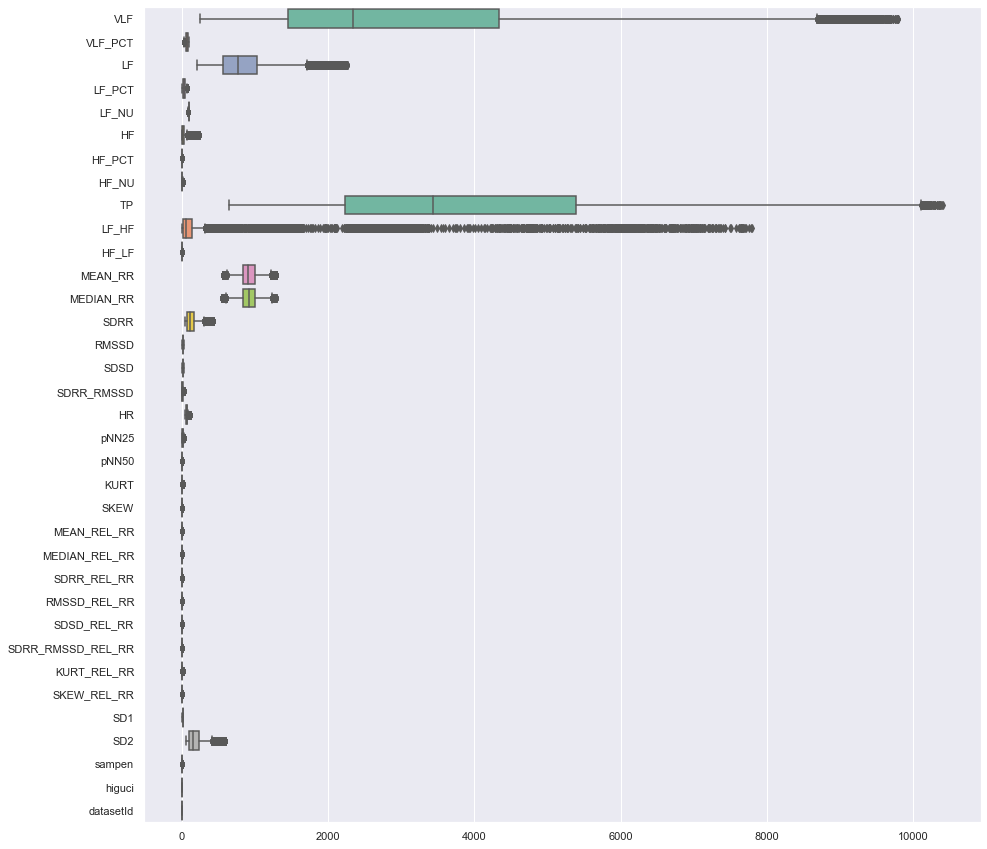

In [29]:
#Boxplot for "time pressure"
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data=df_final[df_final["condition"]=="time pressure"], orient="h", palette="Set2")

In [30]:
#Copying the consolidated file
#df_final.to_csv("heart-rate-final.csv")

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

In [ ]:
#Create a working copy of data

#Test train is already split, so probably not required. However, would we should go ahead 
# and split the training data into validation set! For the purpose of Hyperparameter tuning

#Pipeline steps to consider: Scaling, Label/one-hot encoding, Feature extraction, Feature elimination

#Models to consider
